# Robin Nguyen

# I. Insert data 
## 1. Log Daily Return

In [28]:
# Import packages
import os
import yfinance as yf
import numpy as np
import pandas as pd
import warnings

In [29]:
# Define a function to generate Yahoo Finance Data
def dret(ticker, start_date="2018-01-01", end_date = None , output_directory=output_dir):

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Download price data
    pricedata = yf.download(ticker, start=start_date, end=end_date, progress=False)

    if pricedata.empty:
        return None

    # Suppress RuntimeWarning: invalid value encountered in log
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        
        # Calculate daily log returns using the 'Close' column
        pricedata[('Daily Return', ticker)] = np.log(pricedata['Close'] / pricedata['Close'].shift(1))

    # Drop NaN values resulting from the shift
    pricedata = pricedata.dropna()

    # Define the output file path
    output_file = f"{output_directory}/{ticker}.csv"

    # Check if the file exists and delete it before writing
    if os.path.exists(output_file):
        os.remove(output_file)  # Delete the file to avoid permission issues

    # Save the data to the file
    pricedata.to_csv(output_file, index=True)

    return pricedata

In [30]:
# Define the directory path for saving data
output_dir_tech = "./data/quantitative/tech"

# List of stock tickers
tech_tickers = [
    "AAPL", "MSFT", "GOOGL", "GOOG", "AMZN", "META", "NVDA", "TSM", "ADBE", "INTC",
    "CSCO", "ORCL", "IBM", "CRM", "QCOM", "AVGO", "TXN", "AMD", "AMAT", "MU",
    "NET", "NOW", "SNOW", "DOCU", "SHOP", "UBER", "LYFT", "SNAP", "HRB", "DDOG"
]

# Download data for each ticker
for ticker in tech_tickers:
    data_tech = dret(ticker, start_date="2018-01-01", end_date= None, output_directory=output_dir_tech)

YF.download() has changed argument auto_adjust default to True


In [31]:
# Define the directory path for saving data
output_dir_finbank = "./data/quantitative/fin_bank"

# List of financial and banking tickers
finbank_tickers = [
    "JPM", "BAC", "WFC", "C", "GS", "MS", "USB", "PNC", "TFC", "COF",
    "TD", "SCHW", "BK", "STT", "AXP", "HSBC", "CFG", "FITB", "MTB", "HBAN",
    "ALLY", "KEY", "RY", "SAN", "NTRS", "RF", "SYF", "NBHC", "ZION", "FHN"
]

# Download data for each ticker
for ticker in finbank_tickers:
    data_finbank = dret(ticker, start_date="2018-01-01", end_date= None , output_directory=output_dir_finbank)

In [32]:
# Define the directory path for saving data
output_dir_ev = "./data/quantitative/ev"

# List of financial and banking tickers
ev_tickers = [
    "TSLA", "BYDDY", "LI", "NIO", "RIVN", "LCID", "XPEV", "NKLA", "PSNY", "GM", "F",
    "VWAGY", "BAMXF", "HYMTF", "KIMTF", "POAHY", "MBGYY", "STLA", "GELYF", "GWLLY",
    "SAIC", "HYLN", "GNZUF", "TATAMOTORS.NS", "MAHMF", "RNLSY", "NSANY", "MMTOF"
]

# Download data for each ticker
for ticker in ev_tickers:
    data_ev = dret(ticker, start_date="2018-01-01", end_date= None, output_directory=output_dir_ev)


1 Failed download:
['NKLA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-01 -> 2025-05-02) (Yahoo error = "No data found, symbol may be delisted")')


In [33]:
# Define the directory path for saving data
output_dir_market = "./data/quantitative"

market_data = dret("^GSPC", start_date="2018-01-01", end_date= None, output_directory=output_dir_market)

In [24]:
# View data
market_data

Price,Close,High,Low,Open,Volume,Daily Return
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2018-01-03,2713.060059,2714.370117,2697.770020,2697.850098,3544030000,0.006378
2018-01-04,2723.989990,2729.290039,2719.070068,2719.310059,3697340000,0.004021
2018-01-05,2743.149902,2743.449951,2727.919922,2731.330078,3239280000,0.007009
2018-01-08,2747.709961,2748.510010,2737.600098,2742.669922,3246160000,0.001661
2018-01-09,2751.290039,2759.139893,2747.860107,2751.149902,3467460000,0.001302
...,...,...,...,...,...,...
2024-12-23,5974.069824,5978.250000,5902.569824,5940.250000,3593280000,0.007261
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,0.010982


## 2. FAMA-FERNCH 3-FACTOR MODEL

In [5]:
fama_french_df = pd.read_csv(r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\F-F_Research_Data_Factors_daily.CSV",header=0, skiprows=3, sep=",")

In [6]:
# view dataframe
fama_french_df

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
25897,20241226,0.02,1.04,-0.19,0.017
25898,20241227,-1.17,-0.66,0.56,0.017
25899,20241230,-1.09,0.12,0.74,0.017
25900,20241231,-0.46,0.00,0.71,0.017


In [9]:

# Rename the 'Unnamed: 0' column to 'Date'
fama_french_df = fama_french_df.rename(columns={'Unnamed: 0': 'Date'})

# Remove the copyright row at the end of the table
fama_french_df = fama_french_df.iloc[:-1, :]

# Convert the 'Date' column to the appropriate datetime format
fama_french_df['Date'] = pd.to_datetime(fama_french_df['Date'], format='%Y%m%d')

# Convert percentage columns to decimal numbers
numeric_columns = ['Mkt-RF', 'SMB', 'HML', 'RF']
fama_french_df[numeric_columns] = fama_french_df[numeric_columns].astype(float) / 100

# Filter the data for the specified date range
start_date = pd.Timestamp('2018-01-01')
end_date = pd.Timestamp('2024-12-31')
fama_french_df = fama_french_df.loc[(fama_french_df['Date'] >= start_date) & (fama_french_df['Date'] <= end_date)]

# Display the first few rows of the filtered DataFrame
print(fama_french_df.head())

# Save the cleaned DataFrame to a new CSV file
output_file = r"C:\\Users\\haloi\\Downloads\\data_201_proj\\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\\data\\quantitative\\fama_french\\Cleaned_Fama_French_Data.csv"
fama_french_df.to_csv(output_file, index=False)

print(f"Cleaned data has been saved to: {output_file}")

            Date    Mkt-RF       SMB       HML            RF
24140 2018-01-02  0.000085  0.000035 -0.000022  6.000000e-07
24141 2018-01-03  0.000059 -0.000039 -0.000018  6.000000e-07
24142 2018-01-04  0.000042 -0.000026  0.000024  6.000000e-07
24143 2018-01-05  0.000066 -0.000036 -0.000026  6.000000e-07
24144 2018-01-08  0.000019 -0.000015  0.000004  6.000000e-07
Cleaned data has been saved to: C:\\Users\\haloi\\Downloads\\data_201_proj\\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\\data\\quantitative\\fama_french\\Cleaned_Fama_French_Data.csv


In [8]:
# summary satistic
fama_french_df.iloc[:, 1:5].describe()

,Mkt-RF,SMB,HML,RF
count,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.000488,-0.000078,-0.000121,0.000089
std,0.012738,0.007145,0.010180,0.000078
min,-0.120000,-0.035600,-0.049700,0.000000
25%,-0.004800,-0.004400,-0.005500,0.000000
50%,0.000800,-0.000300,-0.000500,0.000070
75%,0.007100,0.004100,0.005200,0.000170
max,0.093400,0.054700,0.067300,0.000220


In [191]:
# Check for missing values
missing_values = fama_french_df.isna().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: int64)


In [12]:
import pandas as pd
import os

# Define paths
stock_data_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\ev"
fama_french_file_path = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\Cleaned_Fama_French_Data.csv"
output_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev"

# Load the Fama-French data
fama_french_df = pd.read_csv(fama_french_file_path)
fama_french_df['Date'] = pd.to_datetime(fama_french_df['Date'])  # Ensure 'Date' is in datetime format

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each stock data file in the stock data directory
for file_name in os.listdir(stock_data_dir):
    if file_name.endswith('.csv'):  # Ensure it's a CSV file
        stock_file_path = os.path.join(stock_data_dir, file_name)

        try:
            # Load the stock data with the first three rows as header levels
            stock_df = pd.read_csv(stock_file_path, header=[0, 1, 2])  # Include third row for column names
            
            # Flatten the multi-level columns
            stock_df.columns = stock_df.columns.map(lambda x: x[2])  # Use the third level of the header for column names
            
            # Rename the columns
            new_column_names = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily Return']
            if len(stock_df.columns) == len(new_column_names):
                stock_df.columns = new_column_names
            else:
                print(f"Column count mismatch in {file_name}: Skipping file.")
                continue  # Skip this file if column count doesn't match
            
            # Ensure 'Date' is in datetime format
            stock_df['Date'] = pd.to_datetime(stock_df['Date'])
            
            # Merge stock data with Fama-French factors
            merged_df = pd.merge(stock_df, fama_french_df, on='Date', how='inner')
            
            # Save the merged DataFrame to the output directory
            output_file_path = os.path.join(output_dir, f"merged_{file_name}")
            merged_df.to_csv(output_file_path, index=False)

            print(f"Merged data for {file_name} saved to: {output_file_path}")
        
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

Merged data for AAPL.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merged_AAPL.csv
Merged data for ADBE.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merged_ADBE.csv
Merged data for AMAT.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merged_AMAT.csv
Merged data for AMD.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merged_AMD.csv
Merged data for AMZN.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merged_A

Merged data for QCOM.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merged_QCOM.csv
Merged data for RIVN.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merged_RIVN.csv
Merged data for RNLSY.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merged_RNLSY.csv
Merged data for SAIC.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merged_SAIC.csv
Merged data for SHOP.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev\merg

In [13]:
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the path to the directory with merged files
merged_data_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev"

# Loop through all merged CSV files in the directory
for file_name in os.listdir(merged_data_dir):
    if file_name.startswith("merged_") and file_name.endswith(".csv"):  # Process only merged files
        merged_file_path = os.path.join(merged_data_dir, file_name)

        try:
            # Load the merged CSV file
            df = pd.read_csv(merged_file_path)
            print(f"Processing file: {file_name}")

            # Ensure 'Date' is in datetime format
            df['Date'] = pd.to_datetime(df['Date'])

            # Calculate y (dependent variable): Daily Return - RF
            df['y'] = df['Daily Return'] - df['RF']

            # Define x (independent variables): Mkt-RF, SMB, HML
            x = df[['Mkt-RF', 'SMB', 'HML']]
            y = df['y']

            # Add a constant term to the independent variables for the intercept
            x = sm.add_constant(x)

            # Perform the regression
            model = sm.OLS(y, x).fit()

            # Predicted values
            y_pred = model.predict(x)

            # Calculate verification metrics
            mae = mean_absolute_error(y, y_pred)
            mse = mean_squared_error(y, y_pred)
            rmse = np.sqrt(mse)

            # Save the regression summary and metrics to a text file
            output_summary_path = os.path.join(merged_data_dir, f"fama_french_model_summary_{file_name.replace('merged_', '').replace('.csv', '')}.txt")
            with open(output_summary_path, "w") as f:
                f.write(model.summary().as_text())
                f.write("\n\nVerification Metrics:\n")
                f.write(f"Mean Absolute Error (MAE): {mae:.6f}\n")
                f.write(f"Mean Squared Error (MSE): {mse:.6f}\n")
                f.write(f"Root Mean Squared Error (RMSE): {rmse:.6f}\n")
        
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

Processing file: merged_AAPL.csv
Processing file: merged_ADBE.csv
Processing file: merged_AMAT.csv
Processing file: merged_AMD.csv
Processing file: merged_AMZN.csv
Processing file: merged_AVGO.csv
Processing file: merged_BAMXF.csv
Processing file: merged_BYDDY.csv
Processing file: merged_CRM.csv
Processing file: merged_CSCO.csv
Processing file: merged_DDOG.csv
Processing file: merged_DOCU.csv
Processing file: merged_F.csv
Processing file: merged_GELYF.csv
Processing file: merged_GM.csv
Processing file: merged_GNZUF.csv
Processing file: merged_GOOG.csv
Processing file: merged_GOOGL.csv
Processing file: merged_GWLLY.csv
Processing file: merged_HRB.csv
Processing file: merged_HYLN.csv
Processing file: merged_HYMTF.csv
Processing file: merged_IBM.csv
Processing file: merged_INTC.csv
Processing file: merged_KIMTF.csv
Processing file: merged_LCID.csv
Processing file: merged_LI.csv
Processing file: merged_LYFT.csv
Processing file: merged_MAHMF.csv
Processing file: merged_MBGYY.csv
Processing 

In [30]:
import os

# Define the path to the directory containing the .txt files
results_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\fama_french\ev"

# Stocks to extract metrics for
specific_stocks = ['TSLA', 'AAPL', 'AMZN', 'ADBE']

# Loop through the specific stocks
for stock in specific_stocks:
    # Construct the file name for each stock
    file_path = os.path.join(results_dir, f"fama_french_model_summary_{stock}.txt")

    # Check if the file exists
    if os.path.exists(file_path):
        print(f"\n--- Metrics for {stock} ---")
        try:
            # Open and read the file
            with open(file_path, 'r') as file:
                lines = file.readlines()

            # Search for the metrics in the file
            for line in lines:
                if "Mean Absolute Error (MAE):" in line:
                    print(line.strip())
                elif "Mean Squared Error (MSE):" in line:
                    print(line.strip())
                elif "Root Mean Squared Error (RMSE):" in line:
                    print(line.strip())
        except Exception as e:
            print(f"Error reading file for {stock}: {e}")
    else:
        print(f"File not found for {stock}: {file_path}")


--- Metrics for TSLA ---
Mean Absolute Error (MAE): 0.023200
Mean Squared Error (MSE): 0.001112
Root Mean Squared Error (RMSE): 0.033352

--- Metrics for AAPL ---
Mean Absolute Error (MAE): 0.008069
Mean Squared Error (MSE): 0.000129
Root Mean Squared Error (RMSE): 0.011343

--- Metrics for AMZN ---
Mean Absolute Error (MAE): 0.009660
Mean Squared Error (MSE): 0.000201
Root Mean Squared Error (RMSE): 0.014161

--- Metrics for ADBE ---
Mean Absolute Error (MAE): 0.009241
Mean Squared Error (MSE): 0.000218
Root Mean Squared Error (RMSE): 0.014754


## - TSLA: The MAE of 0.0232 indicates that, on average, the model's predictions deviate from the true values by approximately 2.32%. The MSE and RMSE highlight that larger errors are present, as the RMSE (0.0334) is significantly higher than the MAE. This suggests that the model struggles with capturing extreme deviations in TSLA's stock performance.

## - AAPL:  The MAE of 0.0081 shows that the model's predictions are highly accurate, with an average error of less than 1%. The MSE (0.000129) and RMSE (0.0113) confirm strong performance, as the small values indicate the model handles both average and extreme errors well. Overall, the model performs exceptionally well for AAPL.

## - ADBE: The MAE of 0.0097 indicates that the model's predictions for AMZN deviate by less than 1% on average. The MSE (0.000201) and RMSE (0.0142) suggest that while the model has minor errors, it performs slightly worse than it does for AAPL. However, the overall accuracy is still satisfactory.

## - AMZN : The MAE of 0.0092 reflects that the model's average prediction error for ADBE is just below 1%. The MSE (0.000218) and RMSE (0.0148) suggest that the model performs slightly less effectively compared to AAPL and AMZN. While ADBE's metrics show reasonable accuracy, the slightly higher RMSE indicates occasional larger prediction errors.


# II. CAPM MODEL

In [146]:
# Import packages
import os
import pandas as pd
import statsmodels.api as sm

In [14]:
# Define CAPM function
def perform_capm(stock_tickers, market_data, output_dir, start_date="2018-01-01", end_date="2024-12-31"):
    stock_data = {}
    capm_results = {}

    # Download stock data for each ticker
    for ticker in stock_tickers:
        stock_data[ticker] = dret(ticker, start_date=start_date, end_date=end_date, output_directory=output_dir)

    # Ensure market data is available
    if market_data is not None:
        # Independent variable: market daily returns
        market_returns = market_data['Daily Return']

        # Perform CAPM regression for each stock
        for ticker, data in stock_data.items():
            if data is not None:
                try:
                    # Dependent variable: stock daily returns
                    stock_returns = data['Daily Return']

                    # Align data to avoid NaN issues
                    combined_data = pd.concat([stock_returns, market_returns], axis=1).dropna()
                    stock_returns_aligned = combined_data.iloc[:, 0]
                    market_returns_aligned = combined_data.iloc[:, 1]

                    # Add a constant to the independent variable
                    x = sm.add_constant(market_returns_aligned)

                    # Perform linear regression
                    model = sm.OLS(stock_returns_aligned, x).fit()

                    # Store results in the dictionary
                    capm_results[ticker] = model

                    # Print the summary for the ticker
                    print(f"CAPM Results for {ticker}")
                    print(model.summary())
                    print("\n" + "-" * 80 + "\n")

                except Exception as e:
                    print(f"Error processing CAPM for {ticker}: {e}")

    return capm_results

In [15]:
# Perform CAPM regression for the tickers
capm_results_tech = perform_capm(tech_tickers, market_data, output_dir_tech)
capm_results_ev = perform_capm(tech_tickers, market_data, output_dir_ev)
capm_results_finbank = perform_capm(tech_tickers, market_data, output_dir_finbank)

NameError: name 'tech_tickers' is not defined

In [149]:
# Define output direction
output_dir = "./data/quantitative/CAPM_results"

In [150]:
# Export CAPM regression summaries to a text file
output_summary_tech = os.path.join(output_dir, "CAPM_Regression_Summaries_Tech.txt")

with open(output_summary_tech, "w") as file:
    for ticker, model in capm_results_tech.items():
        file.write(f"CAPM Regression Summary for {ticker}:\n")
        file.write(model.summary().as_text())  # Write the summary as text
        file.write("\n" + "-" * 80 + "\n")  # Add a separator for readability

print(f"CAPM regression summaries have been exported to {output_summary_tech}")

CAPM regression summaries have been exported to ./data/quantitative/CAPM_results\CAPM_Regression_Summaries_Tech.txt


In [151]:
# Export CAPM regression summaries to a text file
output_summary_ev = os.path.join(output_dir, "CAPM_Regression_Summaries_Ev.txt")

with open(output_summary_ev, "w") as file:
    for ticker, model in capm_results_tech.items():
        file.write(f"CAPM Regression Summary for {ticker}:\n")
        file.write(model.summary().as_text())  # Write the summary as text
        file.write("\n" + "-" * 80 + "\n")  # Add a separator for readability

print(f"CAPM regression summaries have been exported to {output_summary_ev}")

CAPM regression summaries have been exported to ./data/quantitative/CAPM_results\CAPM_Regression_Summaries_Ev.txt


In [152]:
# Export CAPM regression summaries to a text file
output_summary_finbank = os.path.join(output_dir, "CAPM_Regression_Summaries_Finbank.txt")

with open(output_summary_finbank, "w") as file:
    for ticker, model in capm_results_tech.items():
        file.write(f"CAPM Regression Summary for {ticker}:\n")
        file.write(model.summary().as_text())  # Write the summary as text
        file.write("\n" + "-" * 80 + "\n")  # Add a separator for readability

print(f"CAPM regression summaries have been exported to {output_summary_finbank}")

CAPM regression summaries have been exported to ./data/quantitative/CAPM_results\CAPM_Regression_Summaries_Finbank.txt


## arimax analysis 

In [34]:
import pandas as pd
import os

# Define paths
stock_data_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\ev"
sentiment_file_path = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\sentiment\company_sentiment_20250422_004923.csv"
output_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax"

# Load the Fama-French data
fama_french_df = pd.read_csv(sentiment_file_path)


# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each stock data file in the stock data directory
for file_name in os.listdir(stock_data_dir):
    if file_name.endswith('.csv'):  # Ensure it's a CSV file
        stock_file_path = os.path.join(stock_data_dir, file_name)

        try:
            # Load the stock data with the first three rows as header levels
            stock_df = pd.read_csv(stock_file_path, header=[0, 1, 2])  # Include third row for column names
            
            # Flatten the multi-level columns
            stock_df.columns = stock_df.columns.map(lambda x: x[2])  # Use the third level of the header for column names
            
            # Rename the columns
            new_column_names = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily Return']
            if len(stock_df.columns) == len(new_column_names):
                stock_df.columns = new_column_names
            else:
                print(f"Column count mismatch in {file_name}: Skipping file.")
                continue  # Skip this file if column count doesn't match
            
            # Ensure 'Date' is in datetime format
            stock_df['Date'] = pd.to_datetime(stock_df['Date'])
            
            # Merge stock data with Fama-French factors
            merged_df = pd.merge(stock_df, fama_french_df, on='Date', how='inner')
            
            # Save the merged DataFrame to the output directory
            output_file_path = os.path.join(output_dir, f"merged_{file_name}")
            merged_df.to_csv(output_file_path, index=False)

            print(f"Merged data for {file_name} saved to: {output_file_path}")
        
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

Error processing AAPL.csv: 'Date'
Error processing ADBE.csv: 'Date'
Error processing AMAT.csv: 'Date'
Error processing AMD.csv: 'Date'
Error processing AMZN.csv: 'Date'
Error processing AVGO.csv: 'Date'
Error processing BAMXF.csv: 'Date'
Error processing BYDDY.csv: 'Date'
Error processing CRM.csv: 'Date'
Error processing CSCO.csv: 'Date'
Error processing DDOG.csv: 'Date'
Error processing DOCU.csv: 'Date'
Error processing F.csv: 'Date'
Error processing GELYF.csv: 'Date'
Error processing GM.csv: 'Date'
Error processing GNZUF.csv: 'Date'
Error processing GOOG.csv: 'Date'
Error processing GOOGL.csv: 'Date'
Error processing GWLLY.csv: 'Date'
Error processing HRB.csv: 'Date'
Error processing HYLN.csv: 'Date'
Error processing HYMTF.csv: 'Date'
Error processing IBM.csv: 'Date'
Error processing INTC.csv: 'Date'
Error processing KIMTF.csv: 'Date'
Error processing LCID.csv: 'Date'
Error processing LI.csv: 'Date'
Error processing LYFT.csv: 'Date'
Error processing MAHMF.csv: 'Date'
Error processing

In [1]:
import pandas as pd
import os

# Define paths
stock_data_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\ev"
output_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each stock data file in the stock data directory
for file_name in os.listdir(stock_data_dir):
    if file_name.endswith('.csv'):  # Ensure it's a CSV file
        stock_file_path = os.path.join(stock_data_dir, file_name)

        try:
            # Load the stock data with the first three rows as header levels
            stock_df = pd.read_csv(stock_file_path, header=[0, 1, 2])  # Include third row for column names
            
            # Flatten the multi-level columns
            stock_df.columns = stock_df.columns.map(lambda x: x[2])  # Use the third level of the header for column names
            
            # Rename the columns
            new_column_names = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily Return']
            if len(stock_df.columns) == len(new_column_names):
                stock_df.columns = new_column_names
            else:
                print(f"Column count mismatch in {file_name}: Skipping file.")
                continue  # Skip this file if column count doesn't match
            
            # Save the modified DataFrame to the output directory
            output_file_path = os.path.join(output_dir, f"flattened_{file_name}")
            stock_df.to_csv(output_file_path, index=False)

            print(f"Flattened and renamed data for {file_name} saved to: {output_file_path}")
        
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

Flattened and renamed data for AAPL.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax\flattened_AAPL.csv
Flattened and renamed data for ADBE.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax\flattened_ADBE.csv
Flattened and renamed data for AMAT.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax\flattened_AMAT.csv
Flattened and renamed data for AMD.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax\flattened_AMD.csv
Flattened and renamed data for AMZN.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfoma

Flattened and renamed data for NSANY.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax\flattened_NSANY.csv
Flattened and renamed data for NVDA.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax\flattened_NVDA.csv
Flattened and renamed data for ORCL.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax\flattened_ORCL.csv
Flattened and renamed data for POAHY.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax\flattened_POAHY.csv
Flattened and renamed data for PSNY.csv saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-P

In [35]:
import pandas as pd
import os

# Define paths
stock_data_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\ev_arimax"
sentiment_file_path = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\sentiment\company_sentiment_20250422_004923.csv"
output_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\merged_with_sentiment"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Load the sentiment data
sentiment_df = pd.read_csv(sentiment_file_path)

# Process each flattened stock data file
for file_name in os.listdir(stock_data_dir):
    if file_name.startswith("flattened_") and file_name.endswith(".csv"):  # Ensure it's a CSV file
        stock_file_path = os.path.join(stock_data_dir, file_name)

        try:
            # Load the flattened stock data
            stock_df = pd.read_csv(stock_file_path)

            # Extract the ticker symbol from the file name (e.g., "SAIC" from "flattened_SAIC.csv")
            ticker = file_name.replace("flattened_", "").replace(".csv", "").upper()

            # Filter the sentiment data for this ticker
            ticker_sentiment = sentiment_df[sentiment_df['ticker'] == ticker]

            if ticker_sentiment.empty:
                print(f"No sentiment data found for {ticker}: Skipping file.")
                continue

            # Extract the sentiment scores
            general_sentiment = ticker_sentiment['general_sentiment'].values[0]
            ai_sentiment = ticker_sentiment['ai_sentiment'].values[0]

            # Add sentiment scores as new columns to the stock data
            stock_df['general_sentiment'] = general_sentiment
            stock_df['ai_sentiment'] = ai_sentiment

            # Save the updated DataFrame to the output directory
            output_file_path = os.path.join(output_dir, f"merged_with_sentiment_{ticker}.csv")
            stock_df.to_csv(output_file_path, index=False)

            print(f"Merged data with sentiment for {ticker} saved to: {output_file_path}")
        
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

Merged data with sentiment for AAPL saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\merged_with_sentiment\merged_with_sentiment_AAPL.csv
Merged data with sentiment for ADBE saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\merged_with_sentiment\merged_with_sentiment_ADBE.csv
Merged data with sentiment for AMAT saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\merged_with_sentiment\merged_with_sentiment_AMAT.csv
Merged data with sentiment for AMD saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\merged_with_sentiment\merged_with_sentiment_AMD.csv
Merged data with sentiment for AMZN saved to: C:\Users\haloi\D

Merged data with sentiment for NIO saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\merged_with_sentiment\merged_with_sentiment_NIO.csv
Merged data with sentiment for NKLA saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\merged_with_sentiment\merged_with_sentiment_NKLA.csv
Merged data with sentiment for NOW saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\merged_with_sentiment\merged_with_sentiment_NOW.csv
Merged data with sentiment for NSANY saved to: C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\merged_with_sentiment\merged_with_sentiment_NSANY.csv
Merged data with sentiment for NVDA saved to: C:\Users\haloi\D

## Now we determine the stationary of the dataset to see which model should be appropriate

In [20]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

# Load the data
file_path = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\merged_with_sentiment\merged_with_sentiment_AAPL.csv"
df = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format (if applicable)
df['Date'] = pd.to_datetime(df['Date'])

# Extract the 'Daily Return' column
daily_return = df['Daily Return']

# Perform KPSS test
def kpss_test(series, regression='c'):
    statistic, p_value, n_lags, critical_values = kpss(series, regression=regression)
    print("KPSS Test Results:")
    print(f"KPSS Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Number of Lags: {n_lags}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")
    if p_value < 0.05:
        print("\nThe series is likely non-stationary (reject H₀).")
    else:
        print("\nThe series is likely stationary (fail to reject H₀).")

# Run the KPSS test on 'Daily Return'
kpss_test(daily_return)

KPSS Test Results:
KPSS Statistic: 0.0652
p-value: 0.1000
Number of Lags: 2
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

The series is likely stationary (fail to reject H₀).


C:\Users\haloi\AppData\Local\Temp\ipykernel_25176\1151608173.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression=regression)


## now, We determine the PACF and ACF to see the appropriate (p, d, q) 

<Figure size 1000x600 with 0 Axes>

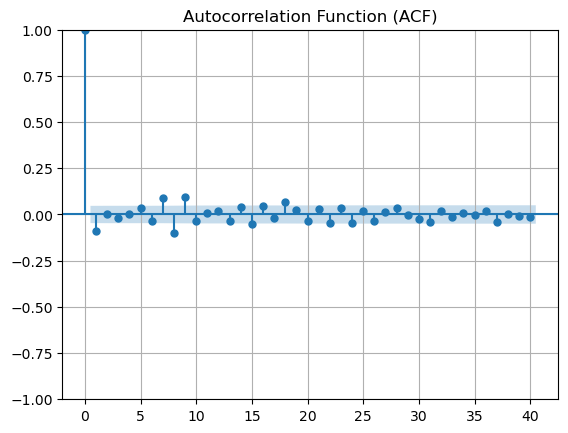

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load the data
file_path = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\merged_with_sentiment\merged_with_sentiment_AAPL.csv"
df = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Extract the 'Daily Return' column
endog = df['Daily Return']

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(endog, lags=40, title='Autocorrelation Function (ACF)', alpha=0.05)
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

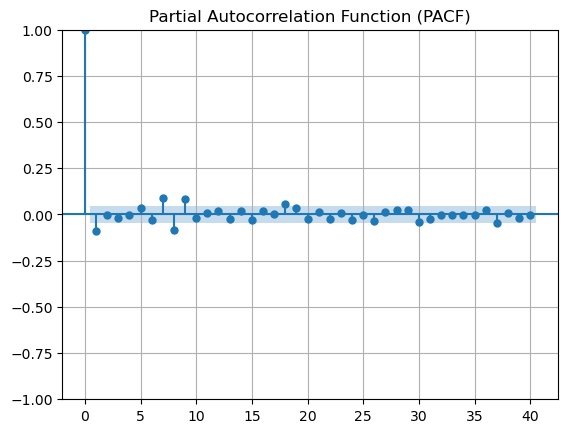

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Load the data
file_path = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\merged_with_sentiment\merged_with_sentiment_AAPL.csv"
df = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Extract the 'Daily Return' column
endog = df['Daily Return']

# Plot the PACF
plt.figure(figsize=(10, 6))
plot_pacf(endog, lags=40, method='ywm', title='Partial Autocorrelation Function (PACF)')
plt.grid()
plt.show()

In [36]:
import pandas as pd
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Define paths
input_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\merged_with_sentiment"
output_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\arimax_results"
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Loop through each file in the input directory
for file_name in os.listdir(input_dir):
    if file_name.startswith("merged_with_sentiment_") and file_name.endswith(".csv"):  # Process only CSV files
        file_path = os.path.join(input_dir, file_name)
        
        try:
            # Load the data
            df = pd.read_csv(file_path)

            # Ensure 'Date' is in datetime format and set as index
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)

            # Define endogenous (endog) and exogenous (exog) variables
            endog = df['Daily Return']
            exog = df[['general_sentiment', 'ai_sentiment']]

            # Check for stationarity using ADF test
            adf_result = adfuller(endog)
            print(f"Processing {file_name} - ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")

            # If the series is not stationary, difference it
            if adf_result[1] > 0.05:  # p-value > 0.05 means non-stationary
                print(f"Differencing applied to {file_name}")
                endog = endog.diff().dropna()

                # Align exog with the differenced endog
                exog = exog.loc[endog.index]

            # Fit ARIMAX model without constant trend
            model = ARIMA(endog, exog=exog, order=(5, 0, 5), trend='n')  # Exclude constant trend
            model_fit = model.fit()

            # Print model summary
            print(model_fit.summary())

            # Make predictions
            predictions = model_fit.predict(start=0, end=len(endog)-1, exog=exog)
            df.loc[endog.index, 'Predicted'] = predictions

            # Plot actual vs. predicted
            plt.figure(figsize=(12, 6))
            plt.plot(endog.index, endog, label='Actual Daily Return', color='blue')
            plt.plot(endog.index, df.loc[endog.index, 'Predicted'], label='Predicted Daily Return', color='orange', linestyle='--')
            plt.title(f'ARIMAX Model: Actual vs. Predicted Daily Return ({file_name})')
            plt.xlabel('Date')
            plt.ylabel('Daily Return')
            plt.legend()
            plt.grid()

            # Save the plot
            plot_path = os.path.join(output_dir, f"{file_name.replace('.csv', '')}_plot.png")
            plt.savefig(plot_path)
            plt.close()

            # Save predictions to a CSV file
            output_file_path = os.path.join(output_dir, f"{file_name.replace('.csv', '_with_predictions.csv')}")
            df.to_csv(output_file_path)
            print(f"Results saved for {file_name} (CSV & Plot).")

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

Processing merged_with_sentiment_AAPL.csv - ADF Statistic: -13.147876013883712, p-value: 1.3862558586991358e-24


C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4479.659
Date:                Fri, 02 May 2025   AIC                          -8933.318
Time:                        12:48:19   BIC                          -8862.175
Sample:                             0   HQIC                         -8907.026
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -6.814e+09      0.000  -2.42e+13      0.000   -6.81e+09   -6.81e+09
ai_sentiment       6.735e+09      0.000   2.36e+13      0.000    6.74e+09    6.74e+09
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4149.322
Date:                Fri, 02 May 2025   AIC                          -8272.644
Time:                        12:48:43   BIC                          -8201.501
Sample:                             0   HQIC                         -8246.352
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  -7.25e+10      0.000  -2.43e+14      0.000   -7.25e+10   -7.25e+10
ai_sentiment       7.172e+10      0.000   2.38e+14      0.000    7.17e+10    7.17e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3824.997
Date:                Fri, 02 May 2025   AIC                          -7623.995
Time:                        12:48:50   BIC                          -7552.852
Sample:                             0   HQIC                         -7597.703
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  1.626e+11      0.000    5.2e+14      0.000    1.63e+11    1.63e+11
ai_sentiment       -1.32e+11      0.000  -3.43e+14      0.000   -1.32e+11   -1.32e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3457.482
Date:                Fri, 02 May 2025   AIC                          -6888.964
Time:                        12:48:57   BIC                          -6817.821
Sample:                             0   HQIC                         -6862.672
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -5.879e+11      0.000  -1.29e+15      0.000   -5.88e+11   -5.88e+11
ai_sentiment       5.539e+11      0.000   1.15e+15      0.000    5.54e+11    5.54e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4244.596
Date:                Fri, 02 May 2025   AIC                          -8463.191
Time:                        12:49:14   BIC                          -8392.049
Sample:                             0   HQIC                         -8436.899
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment   3.33e-05      0.000      0.101      0.920      -0.001       0.001
ai_sentiment         -0.0009      0.000     -2.571      0.010      -0.002      -0.000
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4032.357
Date:                Fri, 02 May 2025   AIC                          -8038.715
Time:                        12:49:20   BIC                          -7967.572
Sample:                             0   HQIC                         -8012.423
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment    -0.0009      0.000     -2.547      0.011      -0.002      -0.000
ai_sentiment         -0.0009      0.000     -2.547      0.011      -0.002      -0.000
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4250.892
Date:                Fri, 02 May 2025   AIC                          -8475.785
Time:                        12:49:45   BIC                          -8404.642
Sample:                             0   HQIC                         -8449.493
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  6.469e+10      0.000   2.31e+14      0.000    6.47e+10    6.47e+10
ai_sentiment      -6.855e+10      0.000  -2.59e+14      0.000   -6.85e+10   -6.85e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3601.013
Date:                Fri, 02 May 2025   AIC                          -7176.026
Time:                        12:49:58   BIC                          -7104.883
Sample:                             0   HQIC                         -7149.734
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  1.614e+11      0.000   4.03e+14      0.000    1.61e+11    1.61e+11
ai_sentiment      -1.459e+11      0.000   -3.3e+14      0.000   -1.46e+11   -1.46e+11
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4110.430
Date:                Fri, 02 May 2025   AIC                          -8194.860
Time:                        12:50:19   BIC                          -8123.717
Sample:                             0   HQIC                         -8168.568
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  6.473e+10      0.000    1.9e+14      0.000    6.47e+10    6.47e+10
ai_sentiment      -6.157e+10      0.000  -1.72e+14      0.000   -6.16e+10   -6.16e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4693.404
Date:                Fri, 02 May 2025   AIC                          -9360.808
Time:                        12:50:32   BIC                          -9289.666
Sample:                             0   HQIC                         -9334.516
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0867      0.000    383.609      0.000       0.086       0.087
ai_sentiment         -0.0821      0.000   -341.695      0.000      -0.083      -0.082
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1328
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2476.945
Date:                Fri, 02 May 2025   AIC                          -4927.890
Time:                        12:50:44   BIC                          -4860.402
Sample:                             0   HQIC                         -4902.595
                               - 1328                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0032      0.001      3.991      0.000       0.002       0.005
ai_sentiment         -0.0039      0.001     -4.379      0.000      -0.006      -0.002
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1679
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3133.545
Date:                Fri, 02 May 2025   AIC                          -6241.089
Time:                        12:50:49   BIC                          -6170.552
Sample:                             0   HQIC                         -6214.960
                               - 1679                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  1.529e+11      0.001   2.73e+14      0.000    1.53e+11    1.53e+11
ai_sentiment      -1.375e+11      0.001  -2.21e+14      0.000   -1.37e+11   -1.37e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3963.574
Date:                Fri, 02 May 2025   AIC                          -7901.149
Time:                        12:51:01   BIC                          -7830.006
Sample:                             0   HQIC                         -7874.857
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -4.099e+10      0.000  -1.14e+14      0.000    -4.1e+10    -4.1e+10
ai_sentiment       4.394e+10      0.000   1.28e+14      0.000    4.39e+10    4.39e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3551.044
Date:                Fri, 02 May 2025   AIC                          -7076.088
Time:                        12:51:06   BIC                          -7004.945
Sample:                             0   HQIC                         -7049.796
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  4.319e+11      0.000   1.06e+15      0.000    4.32e+11    4.32e+11
ai_sentiment      -3.908e+11      0.000  -8.66e+14      0.000   -3.91e+11   -3.91e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4015.319
Date:                Fri, 02 May 2025   AIC                          -8004.638
Time:                        12:51:19   BIC                          -7933.495
Sample:                             0   HQIC                         -7978.346
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0016      0.000      4.535      0.000       0.001       0.002
ai_sentiment         -0.0020      0.000     -5.601      0.000      -0.003      -0.001
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3208.857
Date:                Fri, 02 May 2025   AIC                          -6391.714
Time:                        12:51:32   BIC                          -6320.572
Sample:                             0   HQIC                         -6365.422
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment    -0.0172      0.000    -50.186      0.000      -0.018      -0.017
ai_sentiment          0.0233      0.000     88.982      0.000       0.023       0.024
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4443.046
Date:                Fri, 02 May 2025   AIC                          -8860.091
Time:                        12:51:37   BIC                          -8788.949
Sample:                             0   HQIC                         -8833.799
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  1.492e+11      0.000   6.51e+14      0.000    1.49e+11    1.49e+11
ai_sentiment      -1.471e+11      0.000  -6.33e+14      0.000   -1.47e+11   -1.47e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4453.374
Date:                Fri, 02 May 2025   AIC                          -8880.748
Time:                        12:51:50   BIC                          -8809.605
Sample:                             0   HQIC                         -8854.456
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0014      0.000      6.106      0.000       0.001       0.002
ai_sentiment         -0.0021      0.000     -8.759      0.000      -0.003      -0.002
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3219.113
Date:                Fri, 02 May 2025   AIC                          -6412.227
Time:                        12:51:55   BIC                          -6341.084
Sample:                             0   HQIC                         -6385.935
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  3.824e+11      0.000   7.94e+14      0.000    3.82e+11    3.82e+11
ai_sentiment      -3.712e+11      0.000  -7.49e+14      0.000   -3.71e+11   -3.71e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4163.354
Date:                Fri, 02 May 2025   AIC                          -8300.709
Time:                        12:52:23   BIC                          -8229.566
Sample:                             0   HQIC                         -8274.417
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -3.662e+10      0.000  -1.14e+14      0.000   -3.66e+10   -3.66e+10
ai_sentiment       4.034e+10      0.000   1.39e+14      0.000    4.03e+10    4.03e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1256
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1837.035
Date:                Fri, 02 May 2025   AIC                          -3648.070
Time:                        12:52:32   BIC                          -3581.306
Sample:                             0   HQIC                         -3622.977
                               - 1256                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0012      0.002      0.605      0.545      -0.003       0.005
ai_sentiment               0   6.38e-09          0      1.000   -1.25e-08    1.25e-08
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3037.048
Date:                Fri, 02 May 2025   AIC                          -6048.095
Time:                        12:52:45   BIC                          -5976.953
Sample:                             0   HQIC                         -6021.803
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -5.104e+08      0.000  -1.37e+12      0.000    -5.1e+08    -5.1e+08
ai_sentiment       5.545e+08      0.000   1.61e+12      0.000    5.55e+08    5.55e+08
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4777.646
Date:                Fri, 02 May 2025   AIC                          -9529.292
Time:                        12:52:50   BIC                          -9458.149
Sample:                             0   HQIC                         -9503.000
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -2.173e+11      0.000  -8.59e+14      0.000   -2.17e+11   -2.17e+11
ai_sentiment       2.008e+11      0.000   7.33e+14      0.000    2.01e+11    2.01e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3965.065
Date:                Fri, 02 May 2025   AIC                          -7904.130
Time:                        12:53:01   BIC                          -7832.987
Sample:                             0   HQIC                         -7877.838
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0033      0.000      8.188      0.000       0.003       0.004
ai_sentiment         -0.0027      0.000     -6.191      0.000      -0.004      -0.002
ar.L1                -1.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1076
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1579.492
Date:                Fri, 02 May 2025   AIC                          -3132.984
Time:                        12:53:10   BIC                          -3068.231
Sample:                             0   HQIC                         -3108.461
                               - 1076                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -2.158e+10      0.001  -2.21e+13      0.000   -2.16e+10   -2.16e+10
ai_sentiment       1.638e+10      0.001   1.27e+13      0.000    1.64e+10    1.64e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1111
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1846.315
Date:                Fri, 02 May 2025   AIC                          -3666.630
Time:                        12:53:18   BIC                          -3601.461
Sample:                             0   HQIC                         -3641.988
                               - 1111                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment    -0.0023      0.001     -3.119      0.002      -0.004      -0.001
ai_sentiment          0.0018      0.001      2.556      0.011       0.000       0.003
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1448
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2438.638
Date:                Fri, 02 May 2025   AIC                          -4851.276
Time:                        12:53:29   BIC                          -4782.662
Sample:                             0   HQIC                         -4825.669
                               - 1448                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0087      0.001     12.361      0.000       0.007       0.010
ai_sentiment         -0.0071      0.001     -9.828      0.000      -0.009      -0.006
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2122.717
Date:                Fri, 02 May 2025   AIC                          -4219.435
Time:                        12:53:34   BIC                          -4148.292
Sample:                             0   HQIC                         -4193.143
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  2.621e+11      0.000   1.99e+15      0.000    2.62e+11    2.62e+11
ai_sentiment      -2.435e+11      0.000  -1.72e+15      0.000   -2.43e+11   -2.43e+11
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4146.072
Date:                Fri, 02 May 2025   AIC                          -8266.145
Time:                        12:53:49   BIC                          -8195.002
Sample:                             0   HQIC                         -8239.853
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  4.388e+10      0.000   1.31e+14      0.000    4.39e+10    4.39e+10
ai_sentiment      -4.073e+10      0.000  -1.13e+14      0.000   -4.07e+10   -4.07e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3877.249
Date:                Fri, 02 May 2025   AIC                          -7728.498
Time:                        12:53:56   BIC                          -7657.356
Sample:                             0   HQIC                         -7702.206
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -1.582e+11      0.000   -4.3e+14      0.000   -1.58e+11   -1.58e+11
ai_sentiment       1.592e+11      0.000   4.35e+14      0.000    1.59e+11    1.59e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3733.730
Date:                Fri, 02 May 2025   AIC                          -7441.460
Time:                        12:54:04   BIC                          -7370.317
Sample:                             0   HQIC                         -7415.168
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -2.338e-05      0.000     -0.058      0.954      -0.001       0.001
ai_sentiment          0.0004      0.000      1.154      0.249      -0.000       0.001
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4600.308
Date:                Fri, 02 May 2025   AIC                          -9174.615
Time:                        12:54:27   BIC                          -9103.473
Sample:                             0   HQIC                         -9148.323
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -4.318e+10      0.000  -1.97e+14      0.000   -4.32e+10   -4.32e+10
ai_sentiment        4.37e+10      0.000   2.02e+14      0.000    4.37e+10    4.37e+10
ar.L1                -1.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3710.111
Date:                Fri, 02 May 2025   AIC                          -7394.221
Time:                        12:54:48   BIC                          -7323.079
Sample:                             0   HQIC                         -7367.930
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -1.267e+11      0.000  -3.29e+14      0.000   -1.27e+11   -1.27e+11
ai_sentiment       1.059e+11      0.000    2.3e+14      0.000    1.06e+11    1.06e+11
ar.L1                -1.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1332
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2280.978
Date:                Fri, 02 May 2025   AIC                          -4535.955
Time:                        12:54:54   BIC                          -4468.427
Sample:                             0   HQIC                         -4510.649
                               - 1332                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  3.333e+11      0.001    4.2e+14      0.000    3.33e+11    3.33e+11
ai_sentiment       -2.77e+11      0.001   -2.9e+14      0.000   -2.77e+11   -2.77e+11
ar.L1                   

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1584
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2304.011
Date:                Fri, 02 May 2025   AIC                          -4582.023
Time:                        12:54:59   BIC                          -4512.243
Sample:                             0   HQIC                         -4556.098
                               - 1584                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  4.546e+12      0.001   5.49e+15      0.000    4.55e+12    4.55e+12
ai_sentiment      -3.607e+12      0.001  -3.45e+15      0.000   -3.61e+12   -3.61e+12
ar.L1                   

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1150
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1377.666
Date:                Fri, 02 May 2025   AIC                          -2729.332
Time:                        12:55:10   BIC                          -2663.714
Sample:                             0   HQIC                         -2704.563
                               - 1150                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0031      0.001      2.830      0.005       0.001       0.005
ai_sentiment          0.0029      0.001      2.559      0.010       0.001       0.005
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3957.793
Date:                Fri, 02 May 2025   AIC                          -7889.586
Time:                        12:55:22   BIC                          -7818.444
Sample:                             0   HQIC                         -7863.294
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0060      0.000     19.602      0.000       0.005       0.007
ai_sentiment         -0.0072      0.000    -22.515      0.000      -0.008      -0.007
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4291.186
Date:                Fri, 02 May 2025   AIC                          -8556.371
Time:                        12:55:30   BIC                          -8485.229
Sample:                             0   HQIC                         -8530.080
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  -6.88e+10      0.000  -2.44e+14      0.000   -6.88e+10   -6.88e+10
ai_sentiment       7.101e+10      0.000    2.6e+14      0.000     7.1e+10     7.1e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3539.672
Date:                Fri, 02 May 2025   AIC                          -7053.343
Time:                        12:55:36   BIC                          -6982.201
Sample:                             0   HQIC                         -7027.051
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  2.533e+11      0.000    5.3e+14      0.000    2.53e+11    2.53e+11
ai_sentiment      -2.531e+11      0.000  -5.29e+14      0.000   -2.53e+11   -2.53e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4499.340
Date:                Fri, 02 May 2025   AIC                          -8972.679
Time:                        12:55:41   BIC                          -8901.537
Sample:                             0   HQIC                         -8946.387
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  1.744e+11      0.000   6.93e+14      0.000    1.74e+11    1.74e+11
ai_sentiment      -1.722e+11      0.000  -6.76e+14      0.000   -1.72e+11   -1.72e+11
ar.L1                -1.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4153.598
Date:                Fri, 02 May 2025   AIC                          -8281.197
Time:                        12:55:52   BIC                          -8210.054
Sample:                             0   HQIC                         -8254.905
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -7.548e-05      0.000     -0.232      0.817      -0.001       0.001
ai_sentiment          0.0004      0.000      1.144      0.253      -0.000       0.001
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                  910
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1499.450
Date:                Fri, 02 May 2025   AIC                          -2972.900
Time:                        12:55:55   BIC                          -2910.325
Sample:                             0   HQIC                         -2949.009
                                - 910                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -2.224e+11      0.001  -2.61e+14      0.000   -2.22e+11   -2.22e+11
ai_sentiment       2.224e+11      0.001   2.61e+14      0.000    2.22e+11    2.22e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4015.772
Date:                Fri, 02 May 2025   AIC                          -8005.544
Time:                        12:56:37   BIC                          -7934.402
Sample:                             0   HQIC                         -7979.252
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -5.087e+10      0.000  -1.52e+14      0.000   -5.09e+10   -5.09e+10
ai_sentiment       4.702e+10      0.000    1.3e+14      0.000     4.7e+10     4.7e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                  787
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1208.180
Date:                Fri, 02 May 2025   AIC                          -2390.360
Time:                        12:56:43   BIC                          -2329.673
Sample:                             0   HQIC                         -2367.029
                                - 787                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0019      0.002      1.297      0.195      -0.001       0.005
ai_sentiment         -0.0015      0.002     -0.913      0.361      -0.005       0.002
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3750.145
Date:                Fri, 02 May 2025   AIC                          -7474.289
Time:                        12:56:54   BIC                          -7403.147
Sample:                             0   HQIC                         -7447.997
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  1.401e+09      0.000   3.62e+12      0.000     1.4e+09     1.4e+09
ai_sentiment      -1.413e+09      0.000  -3.69e+12      0.000   -1.41e+09   -1.41e+09
ar.L1                -1.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4394.074
Date:                Fri, 02 May 2025   AIC                          -8762.148
Time:                        12:57:06   BIC                          -8691.006
Sample:                             0   HQIC                         -8735.856
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0130      0.000    118.748      0.000       0.013       0.013
ai_sentiment         -0.0128      0.000   -111.938      0.000      -0.013      -0.013
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3232.055
Date:                Fri, 02 May 2025   AIC                          -6438.110
Time:                        12:57:19   BIC                          -6366.968
Sample:                             0   HQIC                         -6411.818
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment    -0.0049      0.001     -7.648      0.000      -0.006      -0.004
ai_sentiment          0.0032      0.001      5.055      0.000       0.002       0.004
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2846.841
Date:                Fri, 02 May 2025   AIC                          -5667.683
Time:                        12:57:24   BIC                          -5596.540
Sample:                             0   HQIC                         -5641.391
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  1.347e+11      0.001   1.61e+14      0.000    1.35e+11    1.35e+11
ai_sentiment      -1.539e+11      0.001  -2.11e+14      0.000   -1.54e+11   -1.54e+11
ar.L1                   

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1078
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1960.952
Date:                Fri, 02 May 2025   AIC                          -3895.904
Time:                        12:57:32   BIC                          -3831.127
Sample:                             0   HQIC                         -3871.374
                               - 1078                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment    -0.0680      0.001   -102.021      0.000      -0.069      -0.067
ai_sentiment          0.0726      0.001    115.583      0.000       0.071       0.074
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4010.096
Date:                Fri, 02 May 2025   AIC                          -7994.191
Time:                        12:57:37   BIC                          -7923.049
Sample:                             0   HQIC                         -7967.899
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  2.197e+11      0.000    6.4e+14      0.000     2.2e+11     2.2e+11
ai_sentiment      -2.127e+11      0.000     -6e+14      0.000   -2.13e+11   -2.13e+11
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1725
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3741.438
Date:                Fri, 02 May 2025   AIC                          -7456.876
Time:                        12:57:43   BIC                          -7385.987
Sample:                             0   HQIC                         -7430.652
                               - 1725                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -2.778e+11      0.000  -7.67e+14      0.000   -2.78e+11   -2.78e+11
ai_sentiment       2.853e+11      0.000   8.09e+14      0.000    2.85e+11    2.85e+11
ar.L1                   

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                3171.025
Date:                Fri, 02 May 2025   AIC                          -6316.051
Time:                        12:57:55   BIC                          -6244.908
Sample:                             0   HQIC                         -6289.759
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -8.325e+10      0.001  -1.18e+14      0.000   -8.32e+10   -8.32e+10
ai_sentiment       8.494e+10      0.001   1.23e+14      0.000    8.49e+10    8.49e+10
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4227.362
Date:                Fri, 02 May 2025   AIC                          -8428.725
Time:                        12:58:07   BIC                          -8357.582
Sample:                             0   HQIC                         -8402.433
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment    -0.0098      0.000    -25.090      0.000      -0.011      -0.009
ai_sentiment          0.0101      0.000     30.868      0.000       0.009       0.011
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4511.815
Date:                Fri, 02 May 2025   AIC                          -8997.631
Time:                        12:58:25   BIC                          -8926.488
Sample:                             0   HQIC                         -8971.339
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment  9.881e+10      0.000   4.65e+14      0.000    9.88e+10    9.88e+10
ai_sentiment      -8.313e+10      0.000  -3.29e+14      0.000   -8.31e+10   -8.31e+10
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1419
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2821.298
Date:                Fri, 02 May 2025   AIC                          -5616.595
Time:                        12:58:36   BIC                          -5548.245
Sample:                             0   HQIC                         -5591.062
                               - 1419                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment    -0.0111      0.001    -21.622      0.000      -0.012      -0.010
ai_sentiment          0.0112      0.000     22.786      0.000       0.010       0.012
ar.L1                 0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4054.318
Date:                Fri, 02 May 2025   AIC                          -8082.636
Time:                        12:58:47   BIC                          -8011.494
Sample:                             0   HQIC                         -8056.344
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0271      0.000     90.460      0.000       0.027       0.028
ai_sentiment         -0.0261      0.000    -84.984      0.000      -0.027      -0.026
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1091
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1629.145
Date:                Fri, 02 May 2025   AIC                          -3232.289
Time:                        12:58:56   BIC                          -3167.356
Sample:                             0   HQIC                         -3207.715
                               - 1091                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0191      0.001     20.227      0.000       0.017       0.021
ai_sentiment         -0.0178      0.001    -18.062      0.000      -0.020      -0.016
ar.L1                -0.

C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


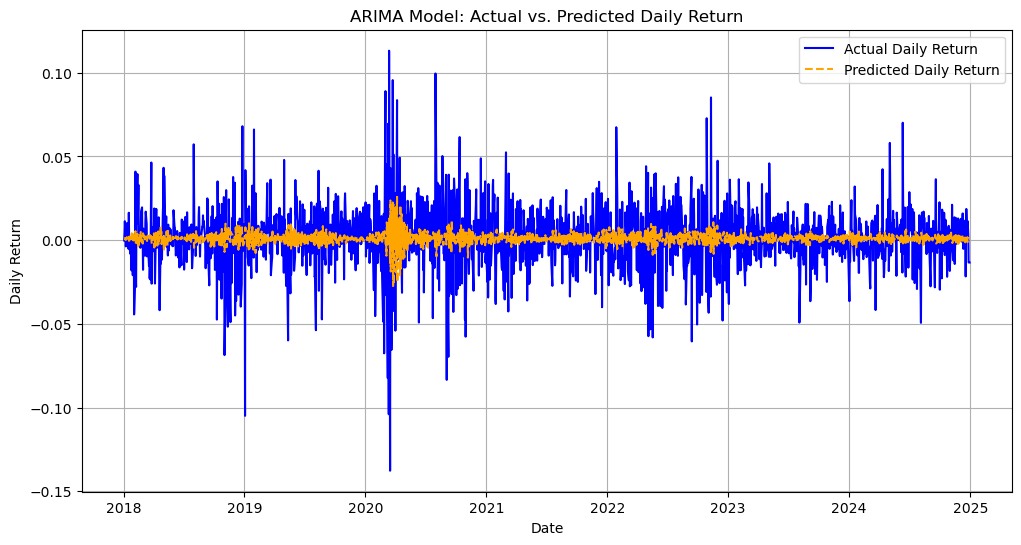

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\merged_with_sentiment\merged_with_sentiment_AAPL.csv"
df = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define endogenous variable (Daily Return)
endog = df['Daily Return']

# Fit ARIMA model (example: order=(1, 0, 1))
model = ARIMA(endog, order=(5, 0, 5 ))
model_fit = model.fit()

# Generate predictions
df['Predicted'] = model_fit.predict(start=0, end=len(endog)-1)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, endog, label='Actual Daily Return', color='blue')
plt.plot(df.index, df['Predicted'], label='Predicted Daily Return', color='orange', linestyle='--')
plt.title('ARIMA Model: Actual vs. Predicted Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid()
plt.show()

In [22]:
import pandas as pd
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Define paths
input_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\merged_with_sentiment"
output_dir = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\arimax_results"
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# File to process
specific_file = "merged_with_sentiment_AAPL.csv"
file_path = os.path.join(input_dir, specific_file)

try:
    # Load the data
    df = pd.read_csv(file_path)

    # Ensure 'Date' is in datetime format and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Define endogenous (endog) and exogenous (exog) variables
    endog = df['Daily Return']
    exog = df[['general_sentiment', 'ai_sentiment']]

    # Check for stationarity using ADF test
    adf_result = adfuller(endog)
    print(f"Processing {specific_file} - ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")

    # If the series is not stationary, difference it
    if adf_result[1] > 0.05:  # p-value > 0.05 means non-stationary
        print(f"Differencing applied to {specific_file}")
        endog = endog.diff().dropna()

        # Align exog with the differenced endog
        exog = exog.loc[endog.index]

    # Fit ARIMAX model without constant trend
    model = ARIMA(endog, exog=exog, order=(5, 0, 5), trend='n')  # Exclude constant trend
    model_fit = model.fit()

    # Print model summary
    print(model_fit.summary())

    # Make predictions
    predictions = model_fit.predict(start=0, end=len(endog)-1, exog=exog)
    df.loc[endog.index, 'Predicted'] = predictions

    # Plot actual vs. predicted
    plt.figure(figsize=(12, 6))
    plt.plot(endog.index, endog, label='Actual Daily Return', color='blue')
    plt.plot(endog.index, df.loc[endog.index, 'Predicted'], label='Predicted Daily Return', color='orange', linestyle='--')
    plt.title(f'ARIMAX Model: Actual vs. Predicted Daily Return ({specific_file})')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid()

    # Save the plot
    plot_path = os.path.join(output_dir, f"{specific_file.replace('.csv', '')}_plot.png")
    plt.savefig(plot_path)
    plt.close()

    # Save predictions to a CSV file
    output_file_path = os.path.join(output_dir, f"{specific_file.replace('.csv', '_with_predictions.csv')}")
    df.to_csv(output_file_path)
    print(f"Results saved for {specific_file} (CSV & Plot).")

except Exception as e:
    print(f"Error processing file {specific_file}: {e}")

Processing merged_with_sentiment_AAPL.csv - ADF Statistic: -13.147876013883712, p-value: 1.3862558586991358e-24


C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1759
Model:                 ARIMA(5, 0, 5)   Log Likelihood                4479.659
Date:                Thu, 01 May 2025   AIC                          -8933.318
Time:                        22:02:01   BIC                          -8862.175
Sample:                             0   HQIC                         -8907.026
                               - 1759                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment -6.814e+09      0.000  -2.42e+13      0.000   -6.81e+09   -6.81e+09
ai_sentiment       6.735e+09      0.000   2.36e+13      0.000    6.74e+09    6.74e+09
ar.L1                -0.

ADF Statistic: -33.2055, p-value: 0.0000


C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\haloi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Daily Return   No. Observations:                 1091
Model:                 ARIMA(5, 0, 5)   Log Likelihood                1629.145
Date:                Thu, 01 May 2025   AIC                          -3232.289
Time:                        22:11:27   BIC                          -3167.356
Sample:                             0   HQIC                         -3207.715
                               - 1091                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
general_sentiment     0.0191      0.001     20.227      0.000       0.017       0.021
ai_sentiment         -0.0178      0.001    -18.062      0.000      -0.020      -0.016
ar.L1                -0.

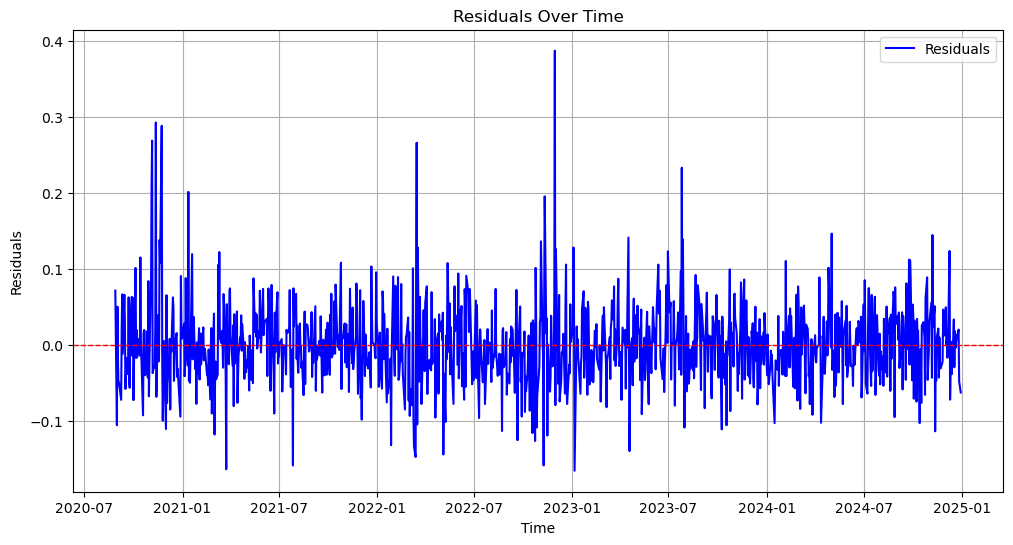

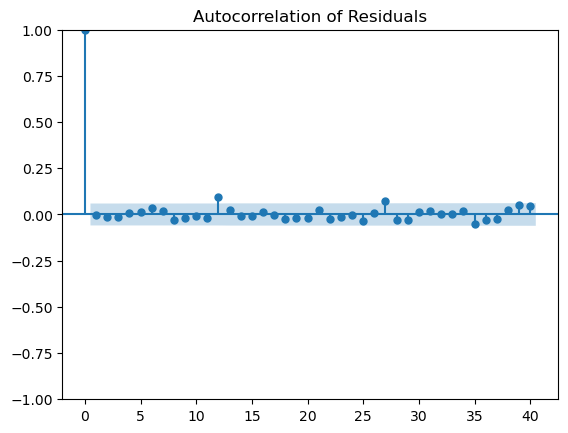

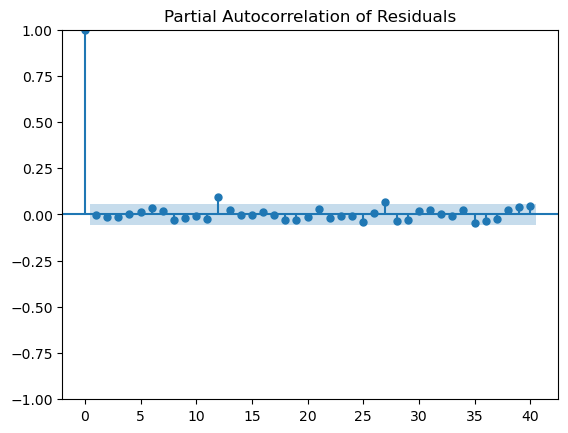

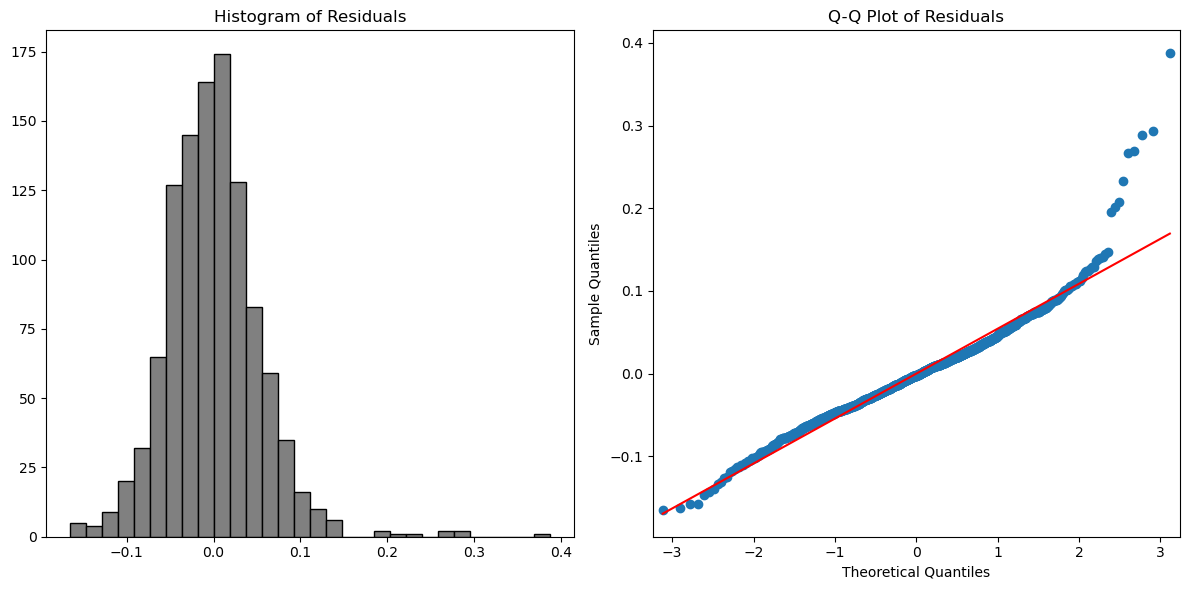

Shapiro-Wilk Test: Statistic=0.9491, p-value=0.0000
Residuals are not normally distributed (reject H₀).
Jarque-Bera Test: Statistic=1303.7410, p-value=0.0000
Residuals are not normally distributed (reject H₀).

Ljung-Box Test (for autocorrelation):
     lb_stat  lb_pvalue
10  3.783568   0.956583
Residuals do not have significant autocorrelation (fail to reject H₀).


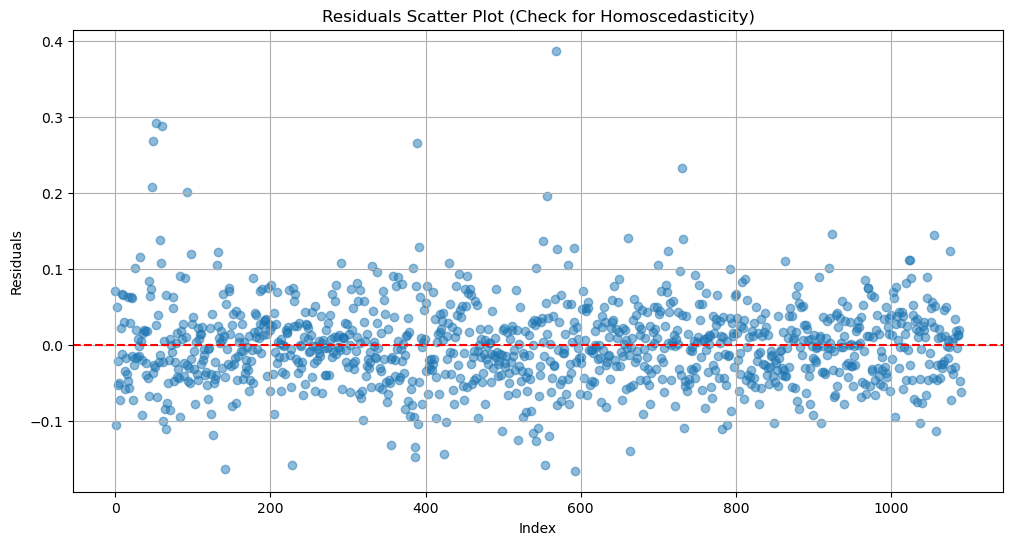

In [25]:
import pandas as pd
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats import shapiro, jarque_bera
import matplotlib.pyplot as plt

# Define paths
file_path = r"C:\Users\haloi\Downloads\data_201_proj\Forecasting-Stock-Perfomance-using-Sentiment-Analysis-ARIMAX-RNN-and-LSTM-main\data\quantitative\arimax\merged_with_sentiment\merged_with_sentiment_XPEV.csv"

# Residual Diagnostics Function
def check_residual_diagnostics(model_fit, endog):
    residuals = model_fit.resid  # Get residuals

    # 1. Plot Residuals
    plt.figure(figsize=(12, 6))
    plt.plot(residuals, label="Residuals", color="blue")
    plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
    plt.title("Residuals Over Time")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.legend()
    plt.grid()
    plt.show()

    # 2. Plot ACF and PACF of Residuals
    sm.graphics.tsa.plot_acf(residuals, lags=40, alpha=0.05)
    plt.title("Autocorrelation of Residuals")
    plt.show()

    sm.graphics.tsa.plot_pacf(residuals, lags=40, alpha=0.05)
    plt.title("Partial Autocorrelation of Residuals")
    plt.show()

    # 3. Histogram & Q-Q Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(residuals, bins=30, color="gray", edgecolor="black")
    plt.title("Histogram of Residuals")
    plt.subplot(1, 2, 2)
    sm.qqplot(residuals, line="s", ax=plt.gca())
    plt.title("Q-Q Plot of Residuals")
    plt.tight_layout()
    plt.show()

    # 4. Shapiro-Wilk Test for Normality
    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test: Statistic={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")
    if shapiro_test[1] < 0.05:
        print("Residuals are not normally distributed (reject H₀).")
    else:
        print("Residuals are normally distributed (fail to reject H₀).")

    # 5. Jarque-Bera Test for Normality
    jb_test = jarque_bera(residuals)
    print(f"Jarque-Bera Test: Statistic={jb_test[0]:.4f}, p-value={jb_test[1]:.4f}")
    if jb_test[1] < 0.05:
        print("Residuals are not normally distributed (reject H₀).")
    else:
        print("Residuals are normally distributed (fail to reject H₀).")

    # 6. Ljung-Box Test for Autocorrelation
    lb_test = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
    print("\nLjung-Box Test (for autocorrelation):")
    print(lb_test)
    if lb_test['lb_pvalue'].iloc[0] < 0.05:
        print("Residuals have significant autocorrelation (reject H₀).")
    else:
        print("Residuals do not have significant autocorrelation (fail to reject H₀).")

    # 7. Plot Residual Variance (Homoscedasticity)
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(residuals)), residuals, alpha=0.5)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.title("Residuals Scatter Plot (Check for Homoscedasticity)")
    plt.xlabel("Index")
    plt.ylabel("Residuals")
    plt.grid()
    plt.show()

# Load the data
df = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define endogenous (endog) and exogenous (exog) variables
endog = df['Daily Return']
exog = df[['general_sentiment', 'ai_sentiment']]

# Check stationarity using ADF test
adf_result = adfuller(endog)
print(f"ADF Statistic: {adf_result[0]:.4f}, p-value: {adf_result[1]:.4f}")

# If the series is not stationary, difference it
if adf_result[1] > 0.05:  # p-value > 0.05 means non-stationary
    print("Differencing applied to make the series stationary.")
    endog = endog.diff().dropna()
    exog = exog.loc[endog.index]  # Align exogenous variables

# Fit ARIMAX model
model = ARIMA(endog, exog=exog, order=(5, 0, 5), trend='n')
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Run residual diagnostics
check_residual_diagnostics(model_fit, endog)